In [1]:
%run config.ipynb

In [2]:
# Connect to Cortex
cortex = Cortex.client()

In [3]:
# Our stock symbols
symbols = ['fb', 'xlf', 'aapl']
s = symbols[0]

In [4]:
print('Loading stock prices for %s' % s)
ds = cortex.dataset('demo/stock-prices-%s' % s)
c = ds.contract('stock-prices')

Loading stock prices for fb


In [5]:
from keras.models import load_model
model = load_model('model_stock_prices_%s.h5' % s)

Using TensorFlow backend.


In [6]:
# Load our scaler model so we can inverse the transform for visualization/validation
price_scaler = c.load_model_file(tag='prices_scaler_%s' % s)

In [12]:
df = c.load_feature_file(tag='prices_%s' % s)
df.tail()

,close
date,
2018-08-02,1.456182
2018-08-03,1.488092
2018-08-06,1.667103
2018-08-07,1.624557
2018-08-08,1.655561


In [8]:
from datetime import timedelta

look_back = 30
future_df = df.copy(deep=True)

start_d = future_df.index.date[-1]
start_idx = len(future_df) - 1
results = {}

for i in range(look_back):
    ix = start_idx + i + 1
    pred_d = start_d + timedelta(days=i+1)
    X = future_df.loc[future_df.index[ix-look_back:ix], 'close'].as_matrix()
    X = X.reshape(1,look_back,1)
    y = model.predict(X)
    pred_price = y[0][0]
    future_df.loc[pd.to_datetime(pred_d), 'close'] = pred_price
    future_df.loc[pd.to_datetime(pred_d), 'Pred'] = pred_price
    print('Predicted price for %s is $%.2f' % (pred_d, price_scaler.inverse_transform(y)))

Predicted price for 2018-08-09 is $181.88
Predicted price for 2018-08-10 is $179.81
Predicted price for 2018-08-11 is $178.11
Predicted price for 2018-08-12 is $176.84
Predicted price for 2018-08-13 is $175.99
Predicted price for 2018-08-14 is $175.50
Predicted price for 2018-08-15 is $175.26
Predicted price for 2018-08-16 is $175.16
Predicted price for 2018-08-17 is $175.12
Predicted price for 2018-08-18 is $175.10
Predicted price for 2018-08-19 is $175.07
Predicted price for 2018-08-20 is $175.01
Predicted price for 2018-08-21 is $174.93
Predicted price for 2018-08-22 is $174.84
Predicted price for 2018-08-23 is $174.75
Predicted price for 2018-08-24 is $174.65
Predicted price for 2018-08-25 is $174.56
Predicted price for 2018-08-26 is $174.47
Predicted price for 2018-08-27 is $174.38
Predicted price for 2018-08-28 is $174.30
Predicted price for 2018-08-29 is $174.23
Predicted price for 2018-08-30 is $174.18
Predicted price for 2018-08-31 is $174.13
Predicted price for 2018-09-01 is 

In [9]:
future_df.loc[:, 'close'] = price_scaler.inverse_transform(future_df.loc[:, 'close'])
future_df.loc[:, 'Pred'] = price_scaler.inverse_transform(future_df.loc[:, 'Pred'])

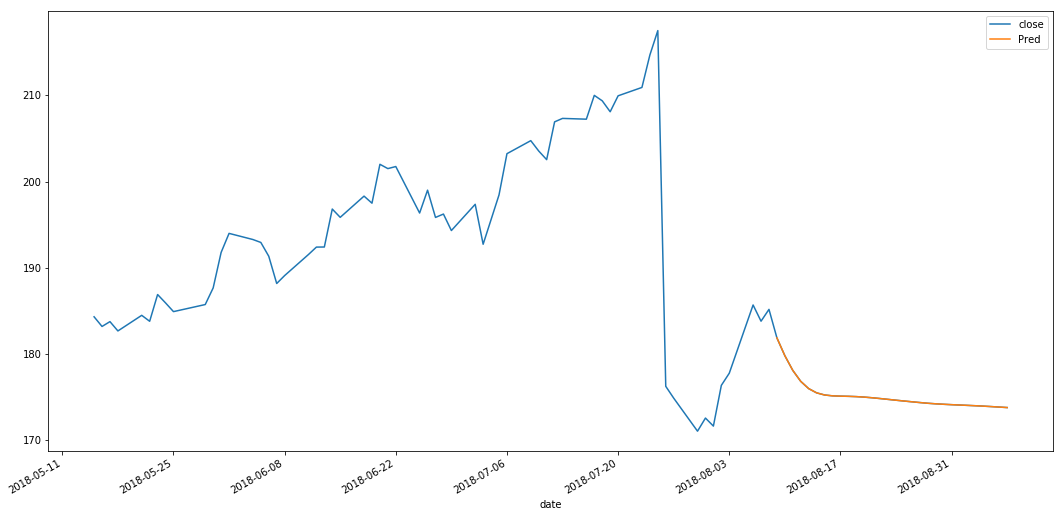

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18,9]
future_df.tail(look_back*3).plot()

In [11]:
future_df.tail(look_back)

,close,Pred
date,,
2018-08-09,181.875497,181.875497
2018-08-10,179.808526,179.808526
2018-08-11,178.105421,178.105421
2018-08-12,176.835147,176.835147
2018-08-13,175.993797,175.993797
2018-08-14,175.502253,175.502253
2018-08-15,175.256334,175.256334
2018-08-16,175.155593,175.155593
2018-08-17,175.120853,175.120853
